In [ ]:
from utils import img_util
from utils import hed_util
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Grab path to current working directory
CWD_PATH = os.getcwd()
TEST_IMAGE_PATH = os.path.join(CWD_PATH, 'test_images')

 
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'model'
HED_NAME = 'HED'
# Grab path to current working directory
CWD_PATH = os.getcwd()
HED_PROTOTEXT_PATH = os.path.join(CWD_PATH,MODEL_NAME,HED_NAME,'deploy.prototxt')
HED_CAFFEE_MODEL_PATH = os.path.join(CWD_PATH,MODEL_NAME,HED_NAME,'hed_pretrained_bsds.caffemodel')
net = hed_util.load_dnn(HED_PROTOTEXT_PATH,HED_CAFFEE_MODEL_PATH)

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 120, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),dtype=np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),dtype=np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5, 5), np.uint8) 
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def tophat(image):
    kernel = np.ones((5, 5), np.uint8) 
    return cv2.morphologyEx(image, cv2.MORPH_TOPHAT, rectKernel)

def adjust_gamma(image, gamma=1.2):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [ ]:
#img = cv2.imread(PATH_TO_IMAGE, cv2.COLOR_BGR2RGB)
PATH_TO_IMAGE = os.path.join(TEST_IMAGE_PATH, 'ocr/myhi00005.jpg')
PATH_TO_IMAGE_OUT = os.path.join(TEST_IMAGE_PATH, 'output.jpg')
img = cv2.imread(PATH_TO_IMAGE, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#gray = cv2.GaussianBlur(gray,(51,51),3)
#gray = cv2.bilateralFilter(gray, 5, 100,100)
plt.imshow(gray)
plt.show()
binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(binary)
plt.show()
cnts = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
boxes = []
cnt = None
max_area = x = y = w = h = 0
i=0
v=0
print('initial max area ', max_area)
for c in cnts:
    area = cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)
    v+=1
    if area > max_area:
        #print('{} > {}'.format(area, max_area))
        #cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        #cv2.drawContours(img, [c], 0, (0,  255, 0), 3)
        cropped = img[y:y + h, x:x + w] 
        max_area = area
        cnt = c    
        boxes.append(c)
        i+=1

plt.imshow(cropped)
#cv2.imwrite(PATH_TO_IMAGE_OUT,cropped)
print('number of contour ',i)
print('number of contour v ',v)


In [ ]:

boxes = np.asarray(boxes)
box = boxes[len(boxes)-1]
#box = boxes[9]
x1,y1,w1,h1 = cv2.boundingRect(box)
print('x1 {} y1 {} w1 {} h1 {} x+w {} y+h {}'.format(x1,y1,w1,h1,x+w,y+h))

#cv2.drawContours(img, [box], 0, (0,  255, 0), 3)
#cv2.rectangle(img, (x1,y1), (x1+w1, y1+h1), (255, 0, 0), 3)
#cv2.drawContours(img, [cnt], 0, (0,  255, 0), 3)
#cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 3)
#cv2.rectangle(img, (left,top), (right,bottom), (255, 0, 0), 2)
print('x {} y {} w {} h {}'.format(x1,y1,w1,h1))
crop_img = img[y1:y1+h1, x1:x1+w1]
plt.imshow(crop_img)

In [ ]:
PATH_TO_IMAGE = os.path.join(TEST_IMAGE_PATH, 'ocr/myhi00005.jpg')
PATH_TO_IMAGE_OUT = os.path.join(TEST_IMAGE_PATH, 'output.jpg')
img = cv2.imread(PATH_TO_IMAGE, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray,(51,51),0)
gray = cv2.equalizeHist(gray)
binary = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)[1]
plt.imshow(binary)
plt.show()
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY_INV,71, 1)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,71, 1)
plt.imshow(th2)
plt.show()
plt.imshow(th3)
plt.show()

cnts = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
boxes = []
cnt = None
max_area = x = y = w = h = 0
i=0
v=0
print('initial max area ', max_area)
for c in cnts:
    area = cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)
    v+=1
    if area > max_area:
        #print('{} > {}'.format(area, max_area))
        #cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        #cv2.drawContours(img, [c], 0, (0,  255, 0), 3)
        cropped = img[y:y + h, x:x + w] 
        max_area = area
        cnt = c    
        boxes.append(c)
        i+=1

plt.imshow(cropped)

In [ ]:
PATH_TO_IMAGE = os.path.join(TEST_IMAGE_PATH, 'ocr/myhi00005.jpg')
PATH_TO_IMAGE_OUT = os.path.join(TEST_IMAGE_PATH, 'output.jpg')
image = cv2.imread(PATH_TO_IMAGE, cv2.IMREAD_COLOR)

alpha = 0.5 # Contrast control (1.0-3.0)
beta = 45 # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

plt.imshow(image)
plt.show()
plt.imshow(adjusted)
plt.show()
adjusted = cv2.cvtColor(adjusted,cv2.COLOR_RGB2GRAY)
adjusted=cv2.threshold(adjusted, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU )[1]
plt.imshow(adjusted)

In [ ]:
PATH_TO_IMAGE = os.path.join(TEST_IMAGE_PATH, 'mxw162nmd8dkxf96q34rs3h0mqg349zrmglmhpqkkv_front.jpeg')
image = cv2.imread(PATH_TO_IMAGE, cv2.IMREAD_COLOR)
plt.imshow(image)
plt.show()
#
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
gray = cv2.equalizeHist(gray)
blur = cv2.GaussianBlur(gray, (15, 15), 0)
#blur = cv2.bilateralFilter(gray, 5, 100,100)
gray_seg = cv2.Canny(blur, 11, 200)
plt.imshow(gray_seg)
plt.show()
#pts = np.argwhere(gray_seg>0)
#y1,x1 = pts.min(axis=0)
#y2,x2 = pts.max(axis=0)
nonzero = cv2.findNonZero(gray_seg)
x, y, w, h = cv2.boundingRect(nonzero)

## crop the region
cropped = image[y:y+h, x:x+w]
plt.imshow(cropped)
plt.show()
tagged = cv2.rectangle(image.copy(), (x,y), (x+w,y+h), (0,255,0), 3, cv2.LINE_AA)
plt.imshow(tagged)

In [ ]:
PATH_TO_IMAGE = os.path.join(TEST_IMAGE_PATH, 'mxw162nmd8dkxf96q34rs3h0mqg349zrmglmhpqkkv_front.jpeg')
image = cv2.imread(PATH_TO_IMAGE, cv2.IMREAD_COLOR)
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

# Define lower and uppper limits of what we call "brown"
white_lo=np.array([0,0,255])
white_hi=np.array([255,255,255])

# Mask image to only select browns
mask=cv2.inRange(hsv,white_lo,white_hi)

# Change image to red where we found brown
image[mask>0]=(0,0,255)
plt.imshow(image)

True

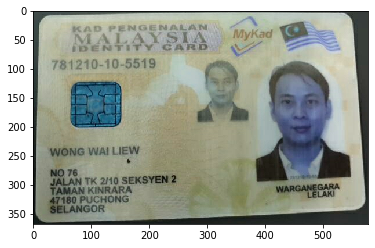

In [67]:
PATH_TO_IMAGE = os.path.join(TEST_IMAGE_PATH, 'mxw14fw639anwz6gs93spea9cqsnghrw6t2l7qc7ze_front.jpeg')
PATH_TO_IMAGE_OUT = os.path.join(TEST_IMAGE_PATH, 'output.jpg')
image = cv2.imread(PATH_TO_IMAGE, cv2.IMREAD_COLOR)
cropped = hed_util.crop_image(net,image)
plt.imshow(cropped)
cv2.imwrite(PATH_TO_IMAGE_OUT, cropped)